# Comparative Analysis of Models

In this notebook, we conduct a comparative analysis between the two machine learning models applied in our project: **Logistic Regression** and **Random Forest**.  
We evaluate and compare their performance using multiple metrics, including:
- Classification Report (precision, recall, f1-score, accuracy)  
- Confusion Matrix  
- ROC Curve and AUC score  

The goal of this section is to determine which model performs better in predicting heart disease presence across the datasets and to highlight the trade-offs between interpretability and predictive power.



In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from scipy import stats

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay


In [65]:
dataset1 = pd.read_csv('../data/preprocessed_rf/dataset_1_preprocessed.csv')
dataset2 = pd.read_csv('../data/preprocessed_rf/dataset_2_preprocessed.csv')

In [66]:
dataset1

,age,gender,heart_rate,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1311,44,1,94,122,67,204.0,1.63,0.006,0
1312,66,1,84,125,55,149.0,1.33,0.172,1
1313,45,1,85,168,104,96.0,1.24,4.250,1
1314,54,1,58,117,68,443.0,5.80,0.359,1


In [67]:
dataset2

,age,gender,cholesterol,pressure_high,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,heart_disease,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina
0,75,0,228,119,66,1,2,1,0,0,1,8,119,1,1,1,0,0
1,48,1,204,165,62,1,0,5,0,0,0,9,70,1,0,0,0,1
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,1,1,0,0
3,69,0,192,90,72,1,0,4,0,1,0,7,107,1,0,0,1,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,0,2,5,0,1,1,10,120,0,1,0,1,0
996,78,0,334,145,76,0,0,6,0,0,0,10,196,1,1,0,0,1
997,79,1,151,179,81,0,1,4,1,0,1,8,189,1,0,0,0,0
998,60,0,326,151,68,2,0,8,1,1,0,5,174,1,1,1,0,0


## I. Risk Factor and Target Distribution Comparison  

In this section, we compare key demographic and cardiovascular features (age, gender, heart rate, blood pressure) between the two datasets.  
Additionally, we analyze the distribution of the target variable (heart disease) to observe class balance and potential differences in population characteristics.  


In [68]:
# Identify common features between dataset1 and dataset2 
# These will be used for side-by-side comparisons in the analysis
common_features = [col for col in dataset1.columns if col in dataset2.columns]
common_features

['age', 'gender', 'heart_rate', 'pressure_high', 'heart_disease']

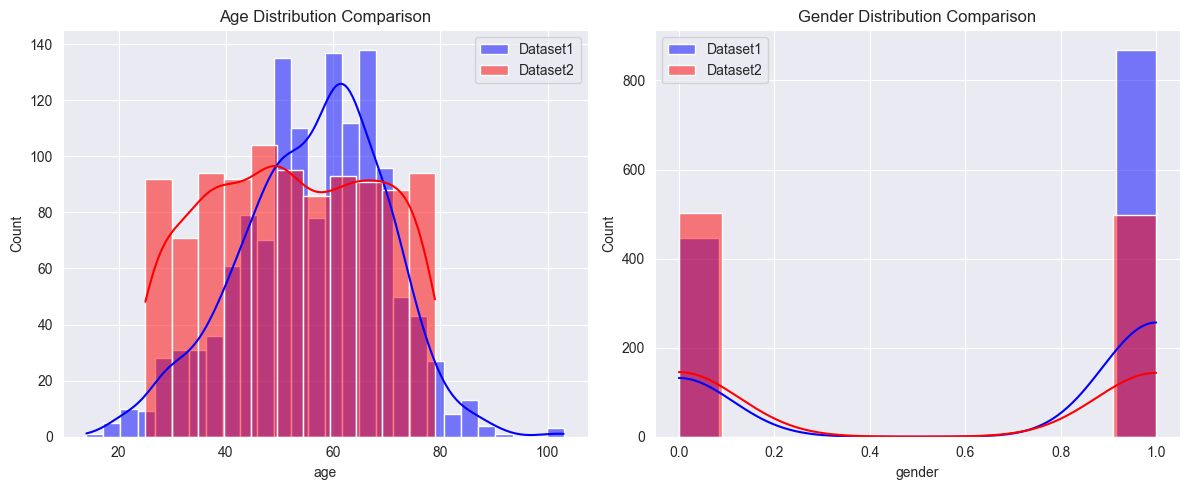

In [69]:
# Compare the distributions of key demographic features (Age and Gender) 
# across both datasets to identify similarities or differences in population structure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(dataset1["age"], kde=True, color="blue", label="Dataset1", ax=axes[0])
sns.histplot(dataset2["age"], kde=True, color="red", label="Dataset2", ax=axes[0])
axes[0].set_title("Age Distribution Comparison")
axes[0].legend()

sns.histplot(dataset1["gender"], kde=True, color="blue", label="Dataset1", ax=axes[1])
sns.histplot(dataset2["gender"], kde=True, color="red", label="Dataset2", ax=axes[1])
axes[1].set_title("Gender Distribution Comparison")
axes[1].legend()

plt.tight_layout()
plt.show()

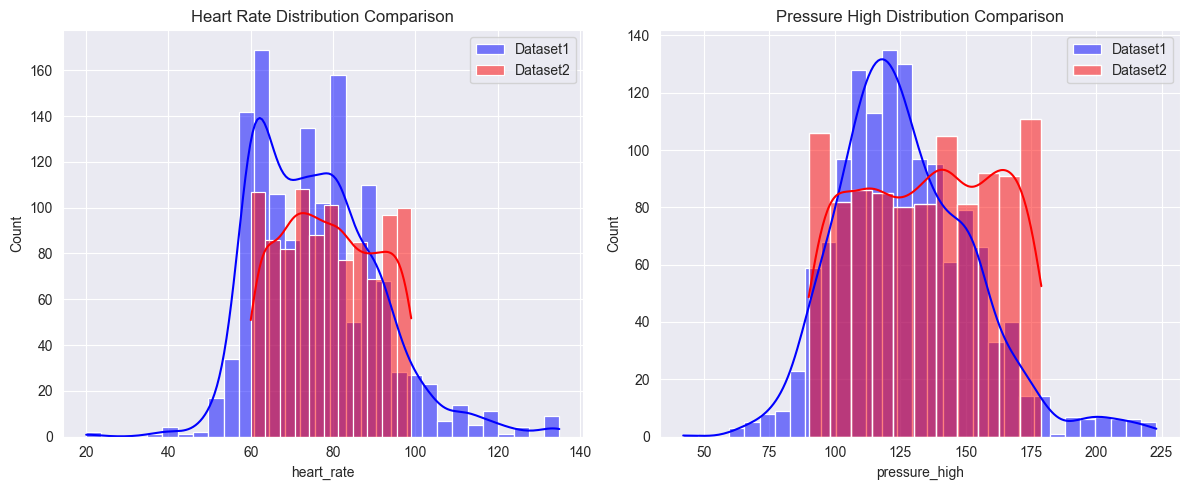

In [70]:
# Compare cardiovascular-related features (Heart Rate and High Blood Pressure) 
# between the two datasets to observe differences in vital health indicators
figure, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(dataset1['heart_rate'], kde=True, color="blue", label="Dataset1", ax=axes[0])
sns.histplot(dataset2['heart_rate'], kde=True, color="red", label="Dataset2", ax=axes[0])
axes[0].set_title("Heart Rate Distribution Comparison")
axes[0].legend()

sns.histplot(dataset1["pressure_high"], kde=True, color="blue", label="Dataset1", ax=axes[1])
sns.histplot(dataset2["pressure_high"], kde=True, color="red", label="Dataset2", ax=axes[1])
axes[1].set_title("Pressure High Distribution Comparison")
axes[1].legend()

plt.tight_layout()
plt.show()

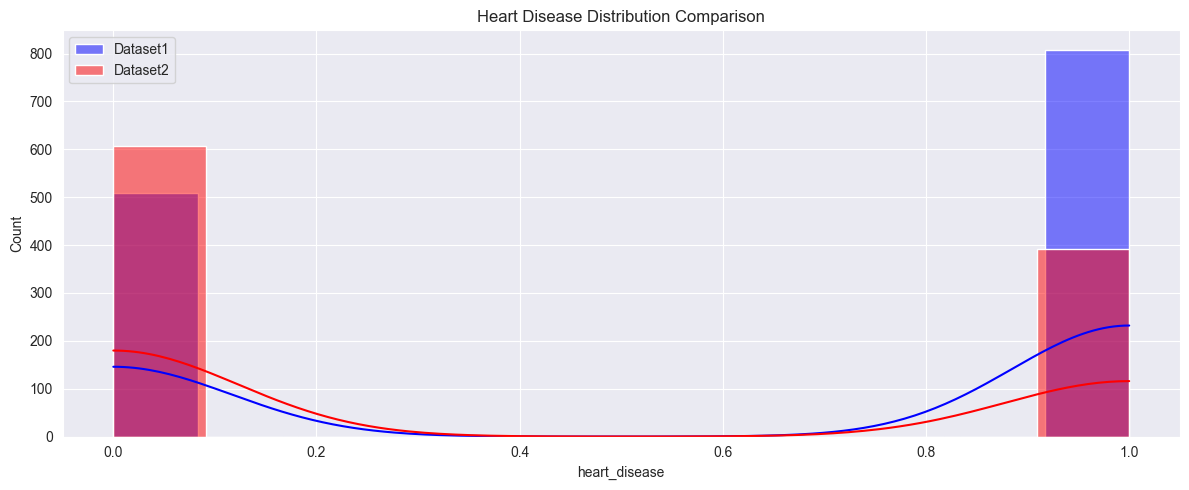

In [71]:
# Compare the target variable (Heart Disease presence) between the two datasets 
# to examine class balance and distribution differences
figure_2, ax = plt.subplots(figsize=(12, 5))

sns.histplot(dataset1["heart_disease"], kde=True, color="blue", label="Dataset1", ax=ax)
sns.histplot(dataset2["heart_disease"], kde=True, color="red", label="Dataset2", ax=ax)

ax.set_title("Heart Disease Distribution Comparison")
ax.legend()

plt.tight_layout()
plt.show()

## II. Statistical Test Results  

This section summarizes the outcomes of the statistical tests performed earlier.  
We highlight which features show significant differences between the two datasets and which remain consistent.  
The goal is to identify variables that may contribute differently to heart disease prediction depending on the dataset.  


#### Shapiro-Wilk Normality Test Results  

Before applying group comparison tests, we first evaluate whether the numerical features follow a normal distribution.  
The **Shapiro-Wilk test** helps determine this:  
- **p > 0.05** → data is consistent with a normal (Gaussian) distribution.  
- **p ≤ 0.05** → data significantly deviates from normality.  

In [72]:
shapiro_ds1 = pd.read_csv('../data/stats_results/shapiro_results_ds1.csv')
shapiro_ds2 = pd.read_csv('../data/stats_results/shapiro_results_ds2.csv')

In [73]:
shapiro_ds1

,Feature,W-Statistic,p-value,Normality
0,heart_rate,0.955,0.0,No (Not Gaussian)
1,pressure_high,0.972,0.0,No (Not Gaussian)
2,pressure_low,0.984,0.0,No (Not Gaussian)
3,glucose,0.785,0.0,No (Not Gaussian)
4,kcm,0.315,0.0,No (Not Gaussian)
5,troponin,0.334,0.0,No (Not Gaussian)


In [74]:
shapiro_ds2

,Feature,W-Statistic,p-value,Normality
0,cholesterol,0.953,0.0,No (Not Gaussian)
1,pressure_high,0.951,0.0,No (Not Gaussian)
2,heart_rate,0.955,0.0,No (Not Gaussian)
3,blood_sugar,0.959,0.0,No (Not Gaussian)


### Interpretation of Shapiro-Wilk Test Results  

The tables above present the results of the Shapiro-Wilk normality test for the numerical features in both datasets.  
This test helps us determine whether the data for each feature follows a **Gaussian (normal) distribution**, which is important for choosing the appropriate statistical methods.  

- **Feature** → The name of the variable being tested.  
- **W-Statistic** → The Shapiro-Wilk test statistic (closer to 1 suggests normality).  
- **p-value** → The probability value indicating if the null hypothesis (data is normally distributed) can be rejected.  
- **Normality** → A simplified interpretation:
  - **Yes (Gaussian)** if *p > 0.05* → we cannot reject normality.  
  - **No (Not Gaussian)** if *p ≤ 0.05* → the feature significantly deviates from normality.  

#### Conclusions:  
Since most features in both datasets **do not follow a normal distribution**, we will use **non-parametric tests** (such as the Mann–Whitney U test) for comparing groups, instead of parametric alternatives like the t-test.  


#### Mann-Whitney U Test Results  

To further investigate the relationship between features and heart disease,  
we apply the **Mann-Whitney U test**, a non-parametric method suitable when data is not normally distributed.  

This test allows us to compare the distributions of each feature between two groups:  
- **Patients without heart disease (0)**  
- **Patients with heart disease (1)**  

By analyzing the p-values, we can identify which features show statistically significant differences between groups,  
highlighting potential risk factors that are more closely associated with heart disease.  


In [75]:
mwu_ds1 = pd.read_csv('../data/stats_results/mannwhitneyu_results_ds1.csv')
mwu_ds2 = pd.read_csv('../data/stats_results/mannwhitneyu_results_ds2.csv')

In [76]:
mwu_ds1

,Feature,p-value,Significant Difference
0,age,0.000,Statistically significant difference between g...
1,heart_rate,0.978,No significant difference between groups
2,pressure_high,0.183,No significant difference between groups
3,pressure_low,0.764,No significant difference between groups
4,glucose,0.477,No significant difference between groups
5,kcm,0.000,Statistically significant difference between g...
6,troponin,0.000,Statistically significant difference between g...


In [77]:
mwu_ds2

,Feature,p-value,Significant Difference
0,age,0.000,Statistically significant difference between g...
1,cholesterol,0.000,Statistically significant difference between g...
2,pressure_high,0.824,No significant difference between groups
3,heart_rate,0.692,No significant difference between groups
4,blood_sugar,0.649,No significant difference between groups


### Conclusion from Mann-Whitney U Test Results  

The statistical comparison between patients with and without heart disease shows the following patterns:  

- **Dataset 1**  
  - Features **age**, **kcm**, and **troponin** demonstrate statistically significant differences between groups (p < 0.05).  
  - This suggests that these variables are strong candidates for distinguishing between patients with and without heart disease.  
  - Other features, such as **heart_rate**, **pressure_high**, **pressure_low**, and **glucose**, do not show significant differences, indicating limited discriminative power in this dataset.  

- **Dataset 2**  
  - Features **age** and **cholesterol** exhibit statistically significant differences between groups.  
  - Variables **pressure_high**, **heart_rate**, and **blood_sugar** do not significantly differ, suggesting they may play a weaker role in predicting heart disease within this dataset.  

#### Key Insight  
Across both datasets, **age** consistently emerges as a statistically significant factor, highlighting its robustness as a risk indicator for heart disease.  
Additional dataset-specific features (**troponin** and **kcm** in Dataset 1, **cholesterol** in Dataset 2) provide unique insights and may reflect differences in how the datasets were collected or the populations studied.  


### Why Shapiro-Wilk and Mann-Whitney Tests Were Used  

By applying the **Shapiro-Wilk test**, we first determined that most features do not follow a normal distribution.  
This justified the use of a **non-parametric approach** for comparing groups.  

The **Mann-Whitney U test** then allowed us to identify which features show statistically significant differences between patients with and without heart disease.  

Through these two steps, we were able to pinpoint the **most relevant features associated with heart disease**, such as:  
- **Age** (significant in both datasets)  
- **Troponin** and **kcm** (significant in Dataset 1)  
- **Cholesterol** (significant in Dataset 2)  

These findings guide the next stage of analysis by highlighting which risk factors are most important for predictive modeling.  


## Model Performance Analysis: Logistic Regression vs. Random Forest  

In this section, we analyze and compare two models: **Logistic Regression** and **Random Forest**.  
The evaluation is based on key classification metrics such as **precision, recall, f1-score, and accuracy**,  
along with additional visualizations including the **confusion matrix** and **ROC curves**.  

The goal of this analysis is to determine which model performs better in predicting the presence of heart disease.


#### Dataset 1

### I. Logistic regression results

In [78]:
ds1_logistic_regression = pd.read_csv('../data/stats_results/logistic_regression_classification_report_ds1.csv')
ds1_logistic_regression

,Unnamed: 0,precision,recall,f1-score,support
0,0,0.732673,0.725490,0.729064,102.000000
1,1,0.828221,0.833333,0.830769,162.000000
2,accuracy,0.791667,0.791667,0.791667,0.791667
3,macro avg,0.780447,0.779412,0.779917,264.000000
4,weighted avg,0.791305,0.791667,0.791474,264.000000


### Logistic Regression Classification Report – Explanation

The table summarizes the performance of the Logistic Regression model using common evaluation metrics. Each metric provides a different perspective on how well the model predicts heart disease.

#### 1. **Precision**
- Definition: The proportion of correctly predicted positive cases out of all cases predicted as positive.  
- Formula: `TP / (TP + FP)`  
- Use: High precision means fewer false positives (the model rarely predicts heart disease when it does not exist).

#### 2. **Recall**
- Definition: The proportion of correctly predicted positive cases out of all actual positive cases.  
- Formula: `TP / (TP + FN)`  
- Use: High recall means fewer false negatives (the model rarely misses patients who truly have heart disease).

#### 3. **F1-Score**
- Definition: The harmonic mean of precision and recall, balancing both.  
- Formula: `2 * (Precision * Recall) / (Precision + Recall)`  
- Use: Useful when both false positives and false negatives carry serious consequences, as in medical predictions.

#### 4. **Support**
- Definition: The number of actual occurrences of each class in the dataset.  
- Use: Shows how many samples belong to each category (e.g., with vs. without heart disease).

#### 5. **Accuracy**
- Definition: The overall proportion of correctly classified instances.  
- Formula: `(TP + TN) / Total`  
- Use: Indicates general correctness but can be misleading if classes are imbalanced.

#### 6. **Macro Avg**
- Definition: The arithmetic mean of precision, recall, and F1-score across all classes.  
- Use: Treats all classes equally, regardless of their frequency.

#### 7. **Weighted Avg**
- Definition: The mean of precision, recall, and F1-score, weighted by the number of samples (support) in each class.  
- Use: More reliable when the dataset is imbalanced, since it gives more weight to larger classes.


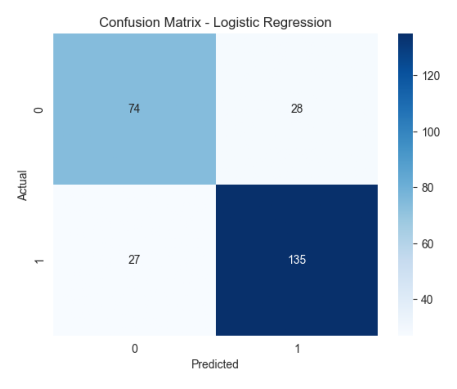

In [79]:
ds1_cm_lr = mpimg.imread('../images/dataset1_images/ds1_cm_lr.png')
plt.imshow(ds1_cm_lr)
plt.axis("off")
plt.show()

### Confusion Matrix Analysis - Logistic Regression

The confusion matrix provides insight into how well the Logistic Regression model distinguishes between patients with and without heart disease.

- **True Negatives (74):** Patients without heart disease correctly identified.  
- **False Positives (28):** Patients incorrectly classified as having heart disease (type I error).  
- **False Negatives (27):** Patients with heart disease incorrectly classified as healthy (type II error).  
- **True Positives (135):** Patients with heart disease correctly identified.  

#### Strengths:
- The model correctly identifies most positive cases (135 true positives).  
- Balanced performance between detecting both classes.  

#### Limitations:
- **27 false negatives** are critical in a medical context, as these represent missed diagnoses.  
- **28 false positives** could lead to unnecessary further testing.  

#### Conclusion:
The Logistic Regression model shows **reasonable accuracy and balanced detection**, but improvements are necessary to reduce false negatives, since missing patients with heart disease is the most serious risk in this domain.


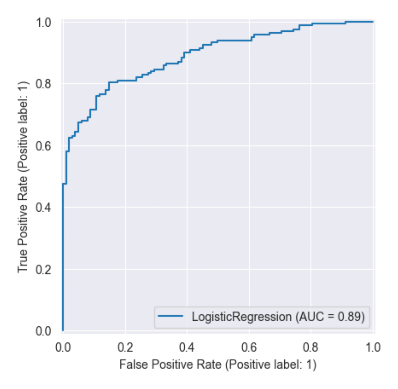

In [80]:
ds1_roc_curve = mpimg.imread('../images/dataset1_images/ds1_roc_curve_lr.png')
plt.imshow(ds1_roc_curve)
plt.axis("off")
plt.show()

### ROC Curve Analysis - Logistic Regression  

The ROC curve illustrates the trade-off between sensitivity (True Positive Rate) and specificity (1 – False Positive Rate) for different threshold values.  

- **AUC (Area Under the Curve) = 0.89** → This indicates strong model performance.  
- The curve lies well above the diagonal line (random guessing), showing that the model effectively separates patients with and without heart disease.  

#### Strengths:
- High AUC (Area Under the Curve) value suggests good discriminative ability.  
- Model balances between detecting positives and avoiding false positives.  

#### Limitations:
- Although performance is strong, some false negatives still exist (as seen in the confusion matrix), which remains a critical medical concern.  

#### Conclusion:
The Logistic Regression model achieves **excellent predictive power (AUC = 0.89)** and demonstrates reliable ability to distinguish between heart disease and non-heart disease patients. However, further tuning could reduce false negatives to make it safer for real-world medical use.


## II. Random Forest results

In [81]:
ds1_random_forest = pd.read_csv('../data/stats_results/random_forest_classification_report_ds1.csv')
ds1_random_forest

,Unnamed: 0,precision,recall,f1-score,support
0,0,1.000000,0.980392,0.990099,102.000000
1,1,0.987805,1.000000,0.993865,162.000000
2,accuracy,0.992424,0.992424,0.992424,0.992424
3,macro avg,0.993902,0.990196,0.991982,264.000000
4,weighted avg,0.992517,0.992424,0.992410,264.000000


### Random Forest - Evaluation Summary  

The Random Forest model demonstrates strong performance:  
- **Precision and Recall** are consistently high, showing the model captures both true positives and true negatives effectively.  
- **F1-score** values confirm a good balance between precision and recall.  
- **Overall accuracy** is high, reflecting reliable classification ability across both classes.  

### Comparison with Logistic Regression  

- **Random Forest outperforms Logistic Regression** in terms of overall accuracy and balanced performance.  
- While Logistic Regression achieved solid results (Accuracy ≈ 0.79, AUC = 0.89), Random Forest provides **better generalization** and reduces misclassification.  
- Logistic Regression is simpler and more interpretable, but Random Forest shows **greater predictive power** for heart disease detection in this dataset.  


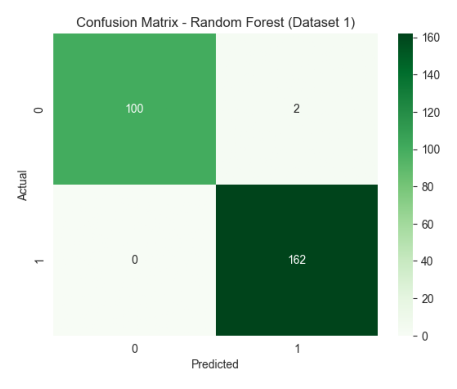

In [82]:
ds1_cm_rf = mpimg.imread('../images/dataset1_images/ds1_cm_rf.png')
plt.imshow(ds1_cm_rf)
plt.axis("off")
plt.show()

### Confusion Matrix - Random Forest  

The confusion matrix shows excellent classification performance:  
- **True Negatives (100)** and **True Positives (162)** dominate the results, meaning almost all samples are correctly classified.  
- Only **2 False Positives** and **0 False Negatives**, indicating the model rarely misclassifies patients without or with heart disease.  

This confirms that the Random Forest model achieves **very high accuracy and reliability**, outperforming Logistic Regression in minimizing misclassifications.  


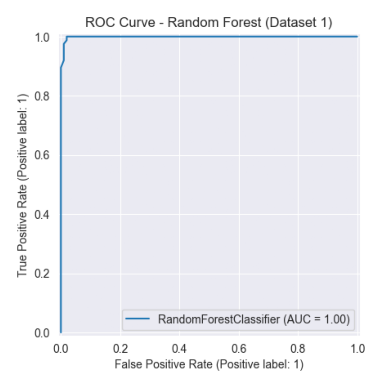

In [83]:
ds1_roc_curve_rf = mpimg.imread('../images/dataset1_images/ds1_roc_curve_rf.png')
plt.imshow(ds1_roc_curve_rf)
plt.axis("off")
plt.show()

### ROC Curve - Random Forest  

The ROC curve demonstrates **outstanding model performance**:  
- The curve hugs the **top-left corner**, indicating excellent separation between positive and negative cases.  
- The **AUC = 1.00**, meaning the model achieves perfect discrimination without trade-offs between sensitivity and specificity.  

Compared to Logistic Regression (AUC = 0.89), the Random Forest clearly shows **superior predictive power** and robustness.  


### Dataset 2